# Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Carga de dataset

1. Delimitador ';'

In [12]:
df = pd.read_csv("CoffeeRatings.csv", delimiter = ';')

In [13]:
df.head(2)

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total,Color
0,85,85,80,80,80,80,100,100,12,8692,Green
1,85,817,80,775,80,80,100,100,12,8642,Green


In [14]:
df.columns
#len(df.columns)

Index(['Scores_Aroma', 'Scores_Flavor', 'Scores_Aftertaste', 'Scores_Acidity',
       'Scores_Body', 'Scores_Balance', 'Scores_Uniformity',
       'Scores_Sweetness', 'Scores_Moisture', 'Scores_Total', 'Color'],
      dtype='object')

In [15]:
df.describe()

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,623.726946,615.576048,611.677844,617.116168,610.330539,611.276647,191.758084,157.644311,8.231138,6675.440719
std,273.720152,274.245606,263.865747,274.480062,276.366482,276.300203,257.583828,203.439529,5.130245,3007.519639
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,717.000000,708.000000,683.000000,717.000000,708.000000,692.000000,100.000000,100.000000,1.000000,7792.000000
50%,758.000000,742.000000,733.000000,742.000000,742.000000,742.000000,100.000000,100.000000,11.000000,8183.000000
75%,775.000000,767.000000,758.000000,767.000000,767.000000,767.000000,100.000000,100.000000,12.000000,8325.000000
max,875.000000,883.000000,867.000000,875.000000,842.000000,858.000000,933.000000,933.000000,17.000000,9058.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Scores_Aroma       835 non-null    int64 
 1   Scores_Flavor      835 non-null    int64 
 2   Scores_Aftertaste  835 non-null    int64 
 3   Scores_Acidity     835 non-null    int64 
 4   Scores_Body        835 non-null    int64 
 5   Scores_Balance     835 non-null    int64 
 6   Scores_Uniformity  835 non-null    int64 
 7   Scores_Sweetness   835 non-null    int64 
 8   Scores_Moisture    835 non-null    int64 
 9   Scores_Total       835 non-null    int64 
 10  Color              835 non-null    object
dtypes: int64(10), object(1)
memory usage: 71.9+ KB


In [17]:
df.describe(include=['O'])
# Columna categórica

,Color
count,835
unique,3
top,Green
freq,681


# Nulos

In [18]:
df.isnull().sum()

Scores_Aroma         0
Scores_Flavor        0
Scores_Aftertaste    0
Scores_Acidity       0
Scores_Body          0
Scores_Balance       0
Scores_Uniformity    0
Scores_Sweetness     0
Scores_Moisture      0
Scores_Total         0
Color                0
dtype: int64

# Gráficos

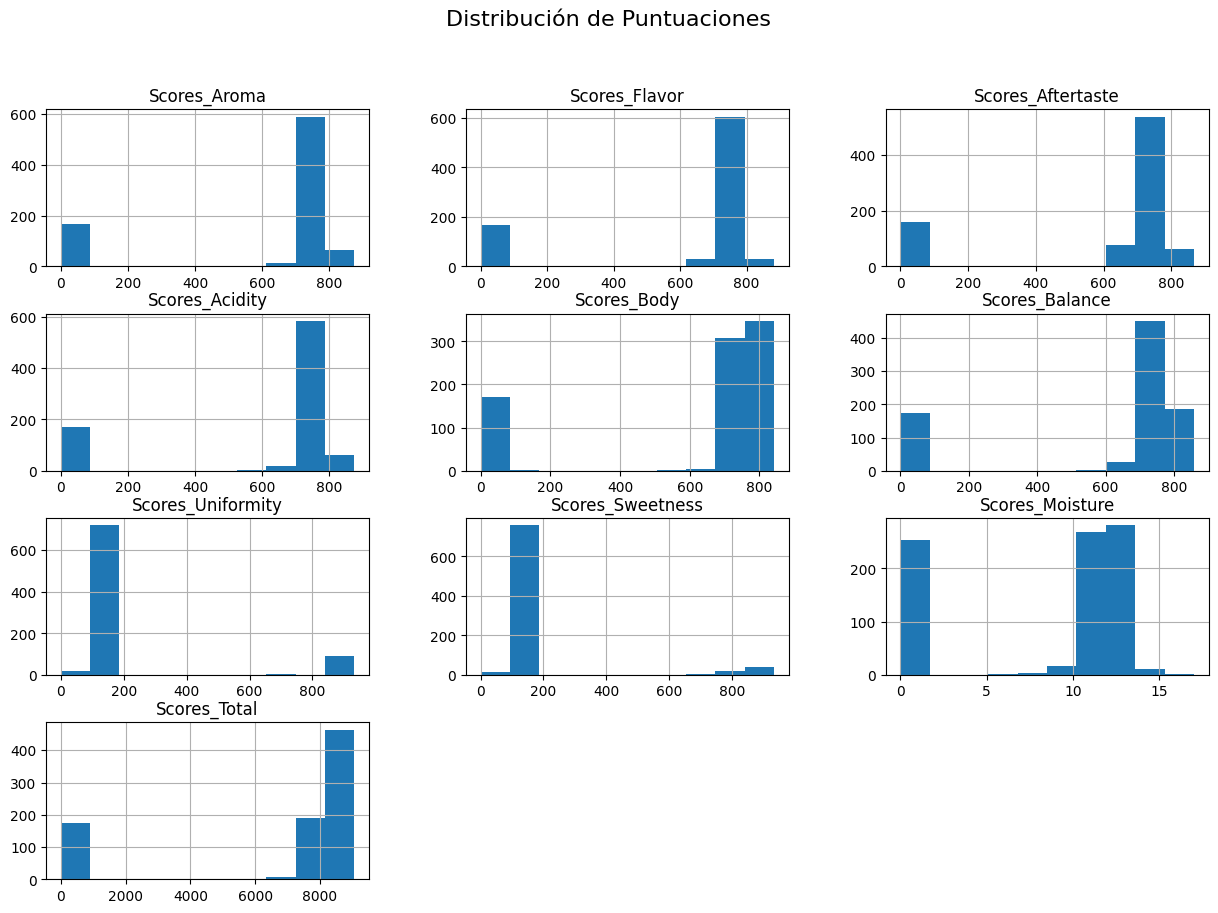

In [19]:
df.hist(bins=10, figsize=(15, 10))
plt.suptitle('Distribución de Puntuaciones', fontsize=16)
plt.show()


# Preparar los datos

In [21]:
# Seleccionar características y etiqueta
X = df.drop('Color', axis=1)
y = df['Color']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [22]:
# Estandarizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

1. Balanceado?

<Axes: xlabel='Color', ylabel='Count'>

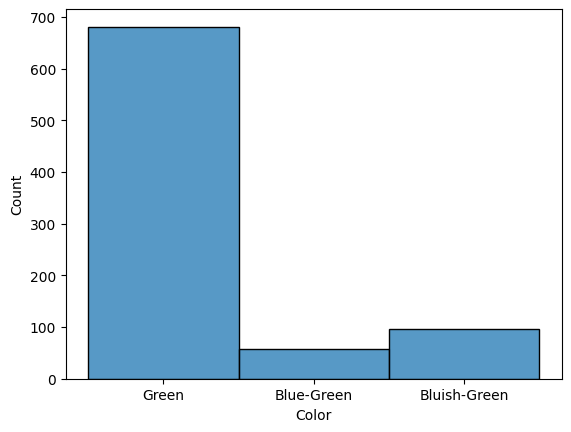

In [35]:
sns.histplot(
    df,
    x="Color"
)

# Prediccion del atributo 'Color' - SVM Kernel Lineal

In [23]:
# Entrenar SVM con kernel lineal
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)

# Validación cruzada
scores = cross_val_score(svm_linear, X_train, y_train, cv=5, scoring='accuracy')
print(f"Precisión media (cross-validation): {scores.mean()}")

# Evaluar en el conjunto de prueba
y_pred = svm_linear.predict(X_test)
print(classification_report(y_test, y_pred))

Precisión media (cross-validation): 0.8173717876781506
              precision    recall  f1-score   support

  Blue-Green       0.00      0.00      0.00        12
Bluish-Green       0.00      0.00      0.00        20
       Green       0.81      1.00      0.89       135

    accuracy                           0.81       167
   macro avg       0.27      0.33      0.30       167
weighted avg       0.65      0.81      0.72       167



c:\Users\mateo\OneDrive\Escritorio\Facultad\4to Cuatrimestre\Mineria\TP3\env\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mateo\OneDrive\Escritorio\Facultad\4to Cuatrimestre\Mineria\TP3\env\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mateo\OneDrive\Escritorio\Facultad\4to Cuatrimestre\Mineria\TP3\env\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_div

# Preduccuib 'Color' usando SVM Kernel Gaussiano

In [24]:
# Entrenar SVM con kernel gaussiano (RBF)
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)

# Validación cruzada
scores = cross_val_score(svm_rbf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Precisión media (cross-validation): {scores.mean()}")

# Evaluar en el conjunto de prueba
y_pred = svm_rbf.predict(X_test)
print(classification_report(y_test, y_pred))

Precisión media (cross-validation): 0.8173717876781506
              precision    recall  f1-score   support

  Blue-Green       0.00      0.00      0.00        12
Bluish-Green       0.00      0.00      0.00        20
       Green       0.81      1.00      0.89       135

    accuracy                           0.81       167
   macro avg       0.27      0.33      0.30       167
weighted avg       0.65      0.81      0.72       167



c:\Users\mateo\OneDrive\Escritorio\Facultad\4to Cuatrimestre\Mineria\TP3\env\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mateo\OneDrive\Escritorio\Facultad\4to Cuatrimestre\Mineria\TP3\env\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mateo\OneDrive\Escritorio\Facultad\4to Cuatrimestre\Mineria\TP3\env\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_div

# Prediccion 'Color' - Random Forest

In [27]:

# Entrenar Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf.fit(X_train, y_train)

# Validación cruzada
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Precisión media (cross-validation): {scores.mean()}")

# Evaluar en el conjunto de prueba
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

Precisión media (cross-validation): 0.8143867130512848
              precision    recall  f1-score   support

  Blue-Green       1.00      0.08      0.15        12
Bluish-Green       0.00      0.00      0.00        20
       Green       0.81      0.98      0.89       135

    accuracy                           0.80       167
   macro avg       0.60      0.35      0.35       167
weighted avg       0.73      0.80      0.73       167

